In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf
from sklearn.metrics.pairwise import linear_kernel # 코사인 유사도
from konlpy.tag import Okt # 토큰화
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from soynlp.normalizer import emoticon_normalize, repeat_normalize
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers
import keras.utils
import sklearn.metrics as metrics
from konlpy.tag import Komoran
# from konlpy.tag import Mecab
# from eunjeon import Mecab

AttributeError: module '_MeCab' has no attribute 'Model_create'

In [ ]:
data = pd.read_csv("data/train.hate.csv")
data

In [ ]:
okt=Okt()

In [2]:
df = pd.read_csv("stop_words.csv",header=None,encoding='cp949')
stopwords = df[1].tolist()

In [724]:
# okt
token=[]
for i in data['comments']:
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
    i = hangul.sub('', i) 
    i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
    temp = okt.morphs(i,stem=True,norm=True)
    temp= [word for word in temp if not word in stopwords]
    token.append(temp)


In [611]:
# # Komoran
# komoran = Komoran()
# token=[]
# for i in data['comments']:
#     hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
#     i = hangul.sub('', i) 
#     i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
#     temp = komoran.morphs(i)
#     temp= [word for word in temp if not word in stopwords]
#     token.append(temp)

In [769]:
# Mecab
mecab = Mecab(dicpath='C;\mecab\mecab-ko-dic')
token=[]
for i in data['comments']:
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
    i = hangul.sub('', i) 
    i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
    temp = mecab.morphs(i)
    temp= [word for word in temp if not word in stopwords]
    token.append(temp)

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [725]:
token

[['현재',
  '호텔',
  '주인',
  '심정',
  '난',
  '마른하늘',
  '날벼락',
  '맞다',
  '호텔',
  '망하다',
  '생기다',
  '누',
  '군',
  '계속',
  '추모',
  '받다'],
 ['한국',
  '인',
  '미인',
  '대표',
  '인',
  '분',
  '너무나',
  '곱',
  '고',
  '아름답다',
  '모습',
  '모습',
  '뒤',
  '슬픔',
  '미처',
  '알다',
  '하다',
  'ㅠ'],
 ['못',
  '되다',
  '넘다',
  '들다',
  '남',
  '고통',
  '즐기다',
  '넘다',
  '들이다',
  '젠',
  '마땅하다',
  '처벌',
  '받다',
  '래야',
  '공정하다',
  '심다',
  '거두다'],
 ['화', '어설프다', '화', '지나다', '갈수록', '너무', '재밌다'],
 ['얼굴', '손톱', '긁다', '인격', '살해', '이고', '동영상', '몰카', '냐', '메걸', '리안', '없다'],
 ['진짜', '이승기', '랑', '비교', '되다'],
 ['년안',
  '남녀',
  '간',
  '성',
  '전쟁',
  '한번',
  '크게',
  '치룬',
  '후',
  '일부다처제',
  '여성',
  '정치',
  '참여',
  '금지',
  '여성',
  '투표',
  '권',
  '삭제',
  '세계',
  '공통',
  '문화',
  '자리',
  '잡다',
  '암탉',
  '너무',
  '울다',
  '댐'],
 ['년뒤', '윤서인', '은', '분명하다', '재', '평가', '되다', '임', '말다', '틀리다', '없다'],
 ['만에', '재미', '느끼다', '프로', '이다', '니', '폐지', '하다', '되다'],
 ['년차',
  '방탄',
  '팬',
  '인데',
  '방탄',
  '처럼',
  '성공',
  '은',
  '못',
  '하다',
  '방탄',
  '부

In [726]:
token = pd.Series(token)

In [727]:
data['token'] = token

In [728]:
data['label'].value_counts()

none         3486
offensive    2499
hate         1911
Name: label, dtype: int64

In [729]:
df = data[['label','token']]

In [730]:
train, test = train_test_split(df, test_size=0.3)

In [731]:
print(train.shape)
print(test.shape)

(5527, 2)
(2369, 2)


In [732]:
xTrain = train['token'].tolist()
xTest = test['token'].tolist()

In [733]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xTrain)

In [734]:
print(tokenizer.word_index)

{'하다': 1, '도': 2, '은': 3, '는': 4, '보다': 5, '아니다': 6, '없다': 7, '다': 8, '되다': 9, '좋다': 10, 'ㅋㅋㅋ': 11, '만': 12, '이다': 13, '못': 14, '나오다': 15, '진짜': 16, '너무': 17, '고': 18, 'ㅋㅋ': 19, '그렇다': 20, '들다': 21, '하고': 22, '남자': 23, '가다': 24, '많다': 25, '않다': 26, '이쁘다': 27, '뭐': 28, '인데': 29, '애': 30, '알다': 31, '거': 32, '인': 33, '게': 34, '니': 35, '그냥': 36, '먹다': 37, '자다': 38, '드라마': 39, '결혼': 40, '돈': 41, '라': 42, '얼굴': 43, '모르다': 44, '면': 45, '연기': 46, '한테': 47, '기사': 48, '랑': 49, '오다': 50, 'ㅋ': 51, '이나': 52, '살다': 53, '받다': 54, '연예인': 55, '지다': 56, '차다': 57, '예쁘다': 58, '요': 59, '이제': 60, '넘다': 61, '맞다': 62, '냐': 63, '정말': 64, '난': 65, '방송': 66, '근데': 67, 'ㅠㅠ': 68, '해주다': 69, '싫다': 70, '많이': 71, '보고': 72, '돼다': 73, '서': 74, '치다': 75, '안되다': 76, '댓글': 77, '응원': 78, '생기다': 79, '나이': 80, '나다': 81, '욕': 82, '싶다': 83, '이렇게': 84, '이렇다': 85, '보이다': 86, '임': 87, '해': 88, '처럼': 89, '인생': 90, '님': 91, '분': 92, '배우': 93, '크다': 94, '보기': 95, '쓰다': 96, '한국': 97, '놈': 98, '요즘': 99, '기': 100, '이네': 101, '어떻다': 102

In [735]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 9849
등장 빈도가 1번 이하인 희귀 단어의 수: 5075
단어 집합에서 희귀 단어의 비율: 51.52807391613362
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.245998862620848


In [736]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4776


In [737]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(xTrain)
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)

In [738]:
xTrain = np.array(xTrain)

In [739]:
xTest = np.array(xTest)

In [740]:
xTrain.shape

(5527,)

In [741]:
xTest.shape

(2369,)

In [742]:
yTrain = np.array(train['label'])
yTest = np.array(test['label'])

In [743]:
yTrain.shape

(5527,)

In [744]:
yTest.shape

(2369,)

리뷰의 최대 길이 : 45
리뷰의 평균 길이 : 11.13533562511308


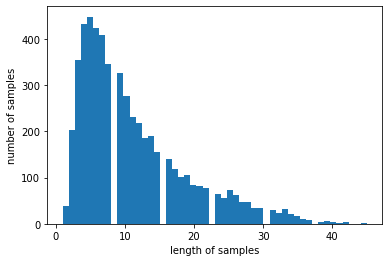

In [745]:
print('리뷰의 최대 길이 :',max(len(l) for l in xTrain))
print('리뷰의 평균 길이 :',sum(map(len, xTrain))/len(xTrain))
plt.hist([len(s) for s in xTrain], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [746]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [747]:
max_len = 35
below_threshold_len(max_len, xTrain)

전체 샘플 중 길이가 35 이하인 샘플의 비율: 99.31246607562873


In [748]:
xTrain = pad_sequences(xTrain, maxlen = max_len)
xTest = pad_sequences(xTest, maxlen = max_len)

In [749]:
print(len(xTrain))
print(len(yTrain))

5527
5527


In [750]:
xTrain

array([[   0,    0,    0, ...,  697,    1,  271],
       [   0,    0,    0, ...,    0,  128,  155],
       [   0,    0,    0, ...,    1,    2,  183],
       ...,
       [   0,    0,    0, ...,  979,    9,  235],
       [   0,    0,    0, ...,  487, 2247,  711],
       [   0,    0,    0, ...,   21,   15,    2]])

In [751]:
def vs(seq):
    res = np.zeros((len(seq),len(yTrain))) 
    for i,sequence in enumerate(seq):
        res[i, sequence] = 1
                 
    return res

xTrain = vs(xTrain)
xTest = vs(xTest)

In [752]:
for i in range(len(yTrain)):
    if yTrain[i] == 'offensive':
        yTrain[i] = float(1)
      
    elif yTrain[i] == 'hate':
        yTrain[i] = float(2)
  
    elif yTrain[i] == 'none':
        yTrain[i] = float(0)
      
    else:
        pass
  

In [753]:
for i in range(len(yTest)):
    if yTest[i] == 'hate':
        yTest[i] = float(2)
      
    elif yTest[i] == 'offensive':
        yTest[i] = float(1)
      
    elif yTest[i] == 'none':
        yTest[i] = float(0)
      
    else:
        pass


In [754]:
yTrain = yTrain.astype(float)
yTrain

array([0., 0., 0., ..., 2., 2., 0.])

In [755]:
yTrain = keras.utils.to_categorical(yTrain, 3)
yTest = keras.utils.to_categorical(yTest, 3)

In [756]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [757]:
# # LSTM 포함 # epochs = 3 / 정확도: 0.4512
# model = Sequential()
# model.add(Embedding(len(xTrain),max_len))
# model.add(LSTM(32))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(3, activation = 'softmax'))
# model.summary()

In [758]:

model = Sequential()
model.add(Dense(512,input_dim = len(xTrain),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 512)               2830336   
_________________________________________________________________
dense_127 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_128 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_129 (Dense)            (None, 3)                 195       
Total params: 2,978,307
Trainable params: 2,978,307
Non-trainable params: 0
_________________________________________________________________


In [759]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
adam = optimizers.Adam(lr = 0.00001)
sgd = optimizers.SGD(lr=0.1,decay=1e-6,momentum=0.9, nesterov = True)

In [760]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer = adam)
history = model.fit(xTrain, yTrain, epochs=10000, callbacks=[es, mc], batch_size=100, validation_split=0.2)

Epoch 1/10000
43/45 [===========================>..] - ETA: 0s - loss: 1.0927 - acc: 0.4200
Epoch 00001: val_acc improved from -inf to 0.41230, saving model to best_model.h5
45/45 [==============================] - 1s 26ms/step - loss: 1.0926 - acc: 0.4207 - val_loss: 1.0924 - val_acc: 0.4123
Epoch 2/10000
43/45 [===========================>..] - ETA: 0s - loss: 1.0878 - acc: 0.4402
Epoch 00002: val_acc did not improve from 0.41230
45/45 [==============================] - 1s 20ms/step - loss: 1.0877 - acc: 0.4406 - val_loss: 1.0901 - val_acc: 0.4069
Epoch 3/10000
43/45 [===========================>..] - ETA: 0s - loss: 1.0832 - acc: 0.4460
Epoch 00003: val_acc did not improve from 0.41230
45/45 [==============================] - 1s 21ms/step - loss: 1.0829 - acc: 0.4479 - val_loss: 1.0876 - val_acc: 0.4078
Epoch 4/10000
43/45 [===========================>..] - ETA: 0s - loss: 1.0780 - acc: 0.4498
Epoch 00004: val_acc did not improve from 0.41230
45/45 [==============================] -

Epoch 00059: val_acc improved from 0.55606 to 0.55877, saving model to best_model.h5
45/45 [==============================] - 1s 22ms/step - loss: 0.3188 - acc: 0.9294 - val_loss: 0.9515 - val_acc: 0.5588
Epoch 60/10000
43/45 [===========================>..] - ETA: 0s - loss: 0.3094 - acc: 0.9344
Epoch 00060: val_acc improved from 0.55877 to 0.56058, saving model to best_model.h5
45/45 [==============================] - 1s 21ms/step - loss: 0.3083 - acc: 0.9344 - val_loss: 0.9572 - val_acc: 0.5606
Epoch 61/10000
43/45 [===========================>..] - ETA: 0s - loss: 0.2986 - acc: 0.9384
Epoch 00061: val_acc did not improve from 0.56058
45/45 [==============================] - 1s 20ms/step - loss: 0.2980 - acc: 0.9385 - val_loss: 0.9629 - val_acc: 0.5597
Epoch 62/10000
43/45 [===========================>..] - ETA: 0s - loss: 0.2890 - acc: 0.9402
Epoch 00062: val_acc did not improve from 0.56058
45/45 [==============================] - 1s 20ms/step - loss: 0.2881 - acc: 0.9407 - val_lo

In [761]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(xTest, yTest)[1]))

75/75 [==============================] - 0s 4ms/step - loss: 0.9497 - acc: 0.5707

 테스트 정확도: 0.5707


In [762]:
pred = loaded_model.predict(xTest)
pred

array([[0.1844077 , 0.44912854, 0.36646378],
       [0.70694804, 0.24457422, 0.04847774],
       [0.8377904 , 0.11089849, 0.05131107],
       ...,
       [0.2565851 , 0.6579562 , 0.08545869],
       [0.6413026 , 0.298228  , 0.0604694 ],
       [0.2305296 , 0.49212423, 0.27734622]], dtype=float32)

In [763]:
yTest_decode = []
for i in range(len(pred)):
    val = yTest[i].argmax()
    yTest_decode.append(val)
len(yTest_decode)

2369

In [764]:
pred_decode = []
for i in range(len(yTest)):
    val = pred[i].argmax()
    pred_decode.append(val)
len(pred_decode)

2369

In [765]:
print('f1 : ',metrics.f1_score(yTest_decode, pred_decode, average='macro'))
print('accuracy', metrics.accuracy_score(yTest_decode, pred_decode))

f1 :  0.5359361173326572
accuracy 0.5707049387927395


In [ ]:
# okt
# f1: 0.5471
# acc: 0.5753

In [306]:
# komoran
# f1: 0.5223
# acc: 0.5547

In [ ]:
# okt + LSTM(16) 
# f1:  0.5307
# accuracy: 0.5618